## Importing Libraries

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

### Training Image Preprocessing

In [33]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [34]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [35]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [36]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[112.25 111.25 119.25]
   [115.25 114.25 122.25]
   [116.75 115.75 123.75]
   ...
   [126.5  128.5  140.5 ]
   [126.   128.   140.  ]
   [125.75 127.75 139.75]]

  [[112.25 111.25 119.25]
   [122.   121.   129.  ]
   [118.   117.   125.  ]
   ...
   [125.75 127.75 139.75]
   [128.75 130.75 142.75]
   [128.   130.   142.  ]]

  [[124.5  123.5  131.5 ]
   [111.75 110.75 118.75]
   [115.25 114.25 122.25]
   ...
   [123.25 125.25 137.25]
   [129.5  131.5  143.5 ]
   [129.5  131.5  143.5 ]]

  ...

  [[ 50.    48.    49.  ]
   [ 49.    47.    52.  ]
   [ 43.25  40.25  49.25]
   ...
   [123.   128.   106.  ]
   [ 95.   100.    77.  ]
   [ 87.25  92.25  69.25]]

  [[ 48.5   46.5   47.5 ]
   [ 47.    45.    50.  ]
   [ 40.25  37.25  46.25]
   ...
   [111.5  119.5   96.5 ]
   [ 97.75 105.75  81.75]
   [ 96.75 104.75  80.75]]

  [[ 47.    45.    46.  ]
   [ 42.    40.    45.  ]
   [ 42.5   39.5   48.5 ]
   ...
   [120.5  128.5  105.5 ]
   [107.5  115.5   91.5 ]
   [ 95.25 103.25  7

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [37]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [38]:
model = Sequential()

In [39]:
## Building Convolution Layer

In [40]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [46]:
model.add(Flatten())

In [47]:
model.add(Dense(units=1500,activation='relu'))

In [48]:
model.add(Dropout(0.4))

In [49]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [50]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
class_names = training_set.class_names  # Works if using image_dataset_from_directory
print(len(class_names))


38


### Model Training

In [53]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=7)

Epoch 1/7
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1214s 551ms/step - accuracy: 0.3858 - loss: 2.1863 - val_accuracy: 0.8469 - val_loss: 0.4950
Epoch 2/7
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1053s 479ms/step - accuracy: 0.8417 - loss: 0.5040 - val_accuracy: 0.9010 - val_loss: 0.3005
Epoch 3/7
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1004s 457ms/step - accuracy: 0.9059 - loss: 0.2918 - val_accuracy: 0.9339 - val_loss: 0.2026
Epoch 4/7
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1009s 459ms/step - accuracy: 0.9373 - loss: 0.1950 - val_accuracy: 0.9462 - val_loss: 0.1695
Epoch 5/7
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1004s 457ms/step - accuracy: 0.9532 - loss: 0.1443 - val_accuracy: 0.9466 - val_loss: 0.1717
Epoch 6/7
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1486s 676ms/step - accuracy: 0.9633 - loss: 0.1096 - val_accuracy: 0.9447 - val_loss: 0.1821
Epoch 7/7
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1687s 768ms/step - accuracy: 0.9687 - loss: 0.0940 - val_accuracy: 0.9567 - val_loss: 0.1378


## Model Evaluation

In [54]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 335s 152ms/step - accuracy: 0.9836 - loss: 0.0498


In [55]:
print(train_loss,train_acc)

0.045045074075460434 0.9855324029922485


In [56]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 72s 131ms/step - accuracy: 0.9588 - loss: 0.1300


In [57]:
print(val_loss,val_acc)

0.1378428041934967 0.9567493796348572


### Saving Model

In [ ]:
model.save("trained_model2.keras")


In [ ]:
training_history.history

{'accuracy': [0.5904971957206726,
  0.8616117835044861,
  0.9151433110237122,
  0.9413471817970276,
  0.955274224281311,
  0.9641653299331665,
  0.9716196060180664],
 'loss': [1.3890870809555054,
  0.43579989671707153,
  0.2629494071006775,
  0.18102101981639862,
  0.13611678779125214,
  0.10737137496471405,
  0.0852513536810875],
 'val_accuracy': [0.8469155430793762,
  0.9009788036346436,
  0.9339289665222168,
  0.9461643695831299,
  0.9465627074241638,
  0.9447416067123413,
  0.9567493796348572],
 'val_loss': [0.4949606955051422,
  0.3004928231239319,
  0.20262400805950165,
  0.16945818066596985,
  0.1716535985469818,
  0.1820605993270874,
  0.13784286379814148]}

In [61]:
#Recording History in json
import json
with open("training_hist2.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
# Load history from JSON file
#import json  # Make sure to import json before using it


#with open("training_hist.json", "r") as file:
    #history = json.load(file)

In [ ]:
training_history.history['val_accuracy']

[0.8469155430793762,
 0.9009788036346436,
 0.9339289665222168,
 0.9461643695831299,
 0.9465627074241638,
 0.9447416067123413,
 0.9567493796348572]

### Accuracy Visualization

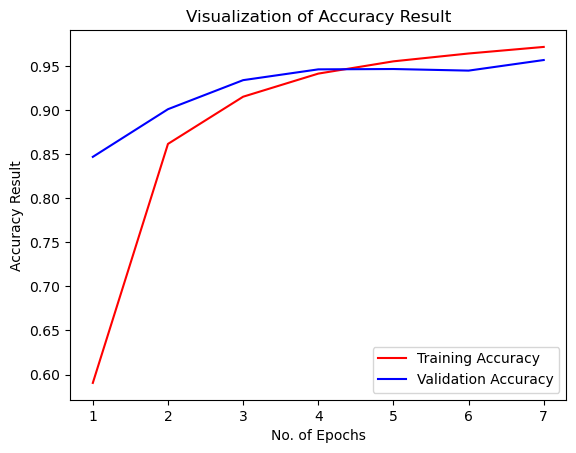

In [63]:
epochs = list(range(1, len(training_history.history['accuracy']) + 1))

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()


In [ ]:
#to load model here
#from tensorflow.keras.models import load_model
#loaded_model = load_model('trained_model.keras')

In [ ]:
#loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

### Some other metrics for model evaluation

In [64]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [65]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [66]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 76s 138ms/step


(array([[9.99994278e-01, 3.13005353e-06, 2.26247423e-07, ...,
         5.13330101e-13, 9.47697216e-12, 8.55648972e-12],
        [9.99999762e-01, 5.24106163e-08, 1.53428614e-09, ...,
         7.90172642e-15, 3.86277729e-12, 1.30365935e-14],
        [9.99998927e-01, 1.88584366e-08, 8.65259267e-07, ...,
         1.00855737e-15, 7.78510069e-13, 4.73993414e-12],
        ...,
        [3.99021793e-09, 1.23784472e-11, 4.14114787e-08, ...,
         5.88407933e-10, 1.24434574e-10, 9.99998450e-01],
        [1.11161956e-11, 2.11014423e-14, 4.28375703e-11, ...,
         1.77274631e-13, 2.28461998e-13, 1.00000000e+00],
        [1.73708256e-13, 3.14507636e-14, 2.20178845e-12, ...,
         3.06557724e-14, 9.48414416e-13, 9.99999881e-01]], dtype=float32),
 (17572, 38))

In [67]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [68]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [69]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [70]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

![image.png](attachment:f464cbcc-5d6b-4f32-835c-9aabe0f9c5d4.png)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.97      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.96       440
                                   Apple___healthy       0.94      0.97      0.96       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.94      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

In [73]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[477,   5,   1, ...,   0,   1,   0],
       [  0, 488,   0, ...,   0,   0,   0],
       [  0,   0, 414, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 473,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

### Confusion Matrix Visualization

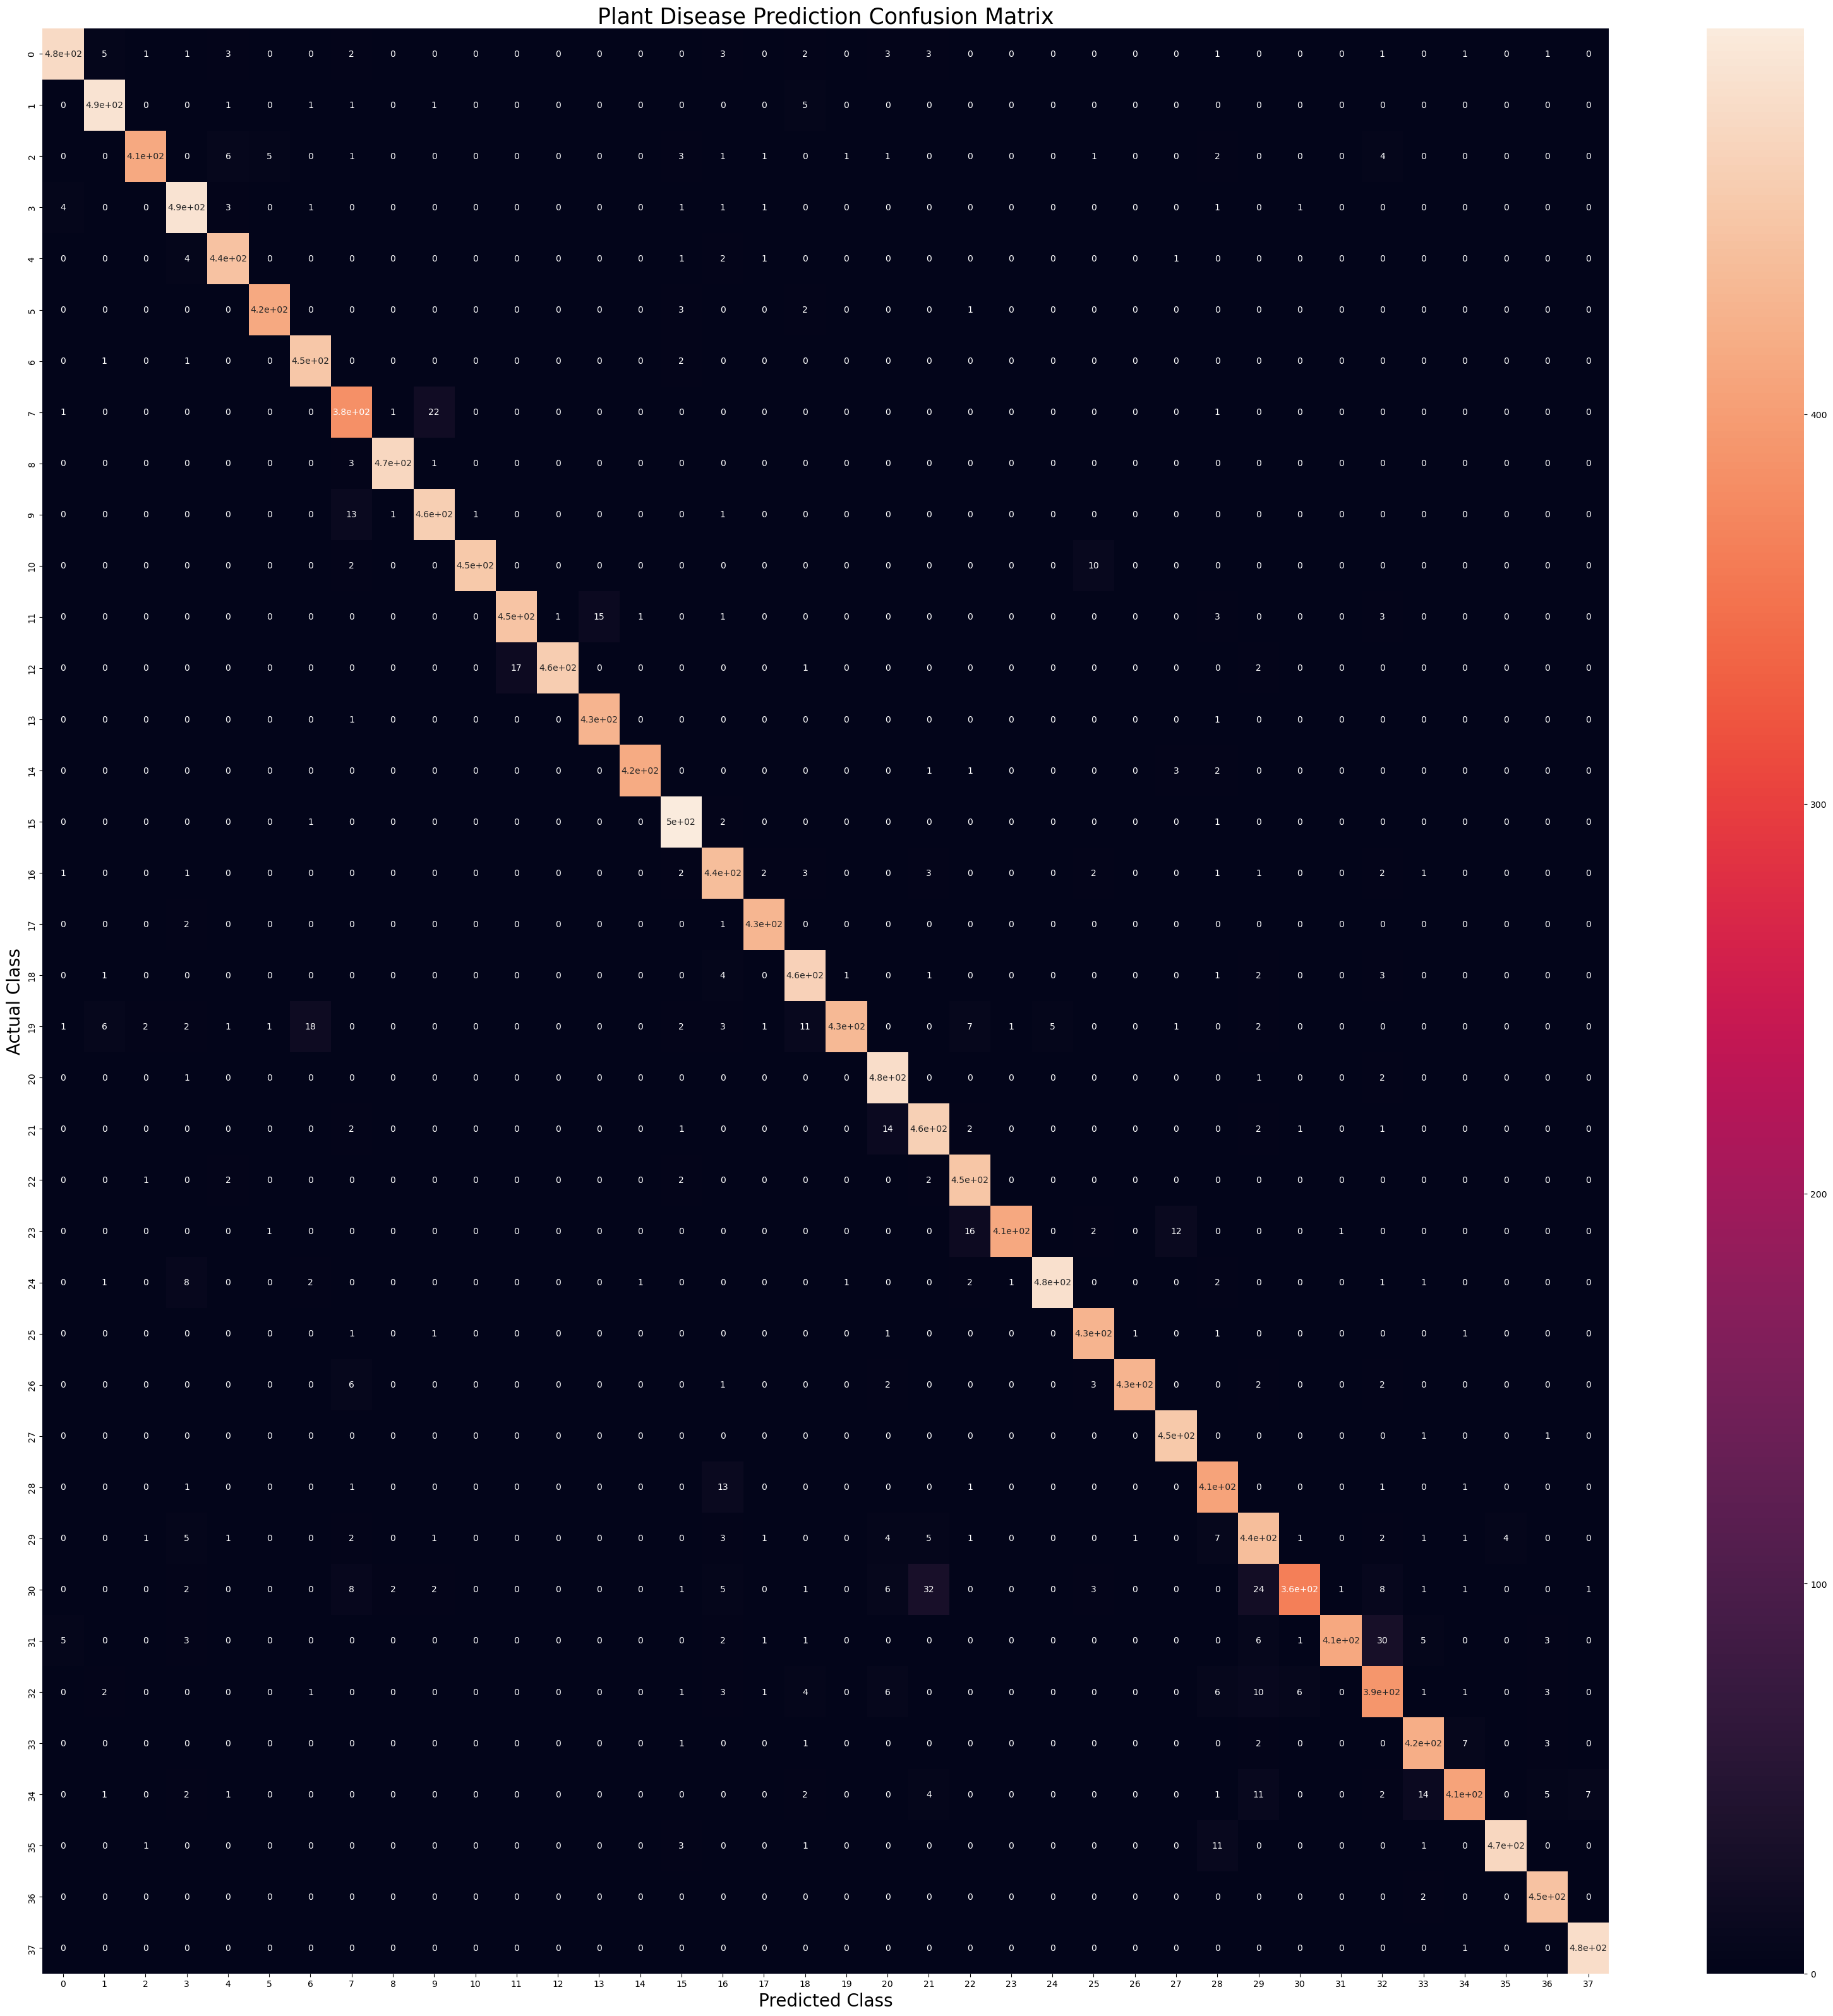

In [74]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()
